In [1]:
# import sys
# sys.path.append('/content/Rethinking-the-Usage-of-Normalization-and-Dropout-in-the-Training-of-Deep-Neural-Networks/')

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchsummary import summary
from models.resnet import resnet110, resnet110_ic
from train.training import Learner
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
model = resnet110()
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar10', train_config=train_config)
res = learner.train()

INFO: Creating resnet110 model


In [2]:
model = resnet110_ic()
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar10', train_config=train_config)
res = learner.train()

INFO: Creating resnet110 model with IC layer


In [2]:
res = np.load('./res/cifar10_resnet110.npy')
res_ic = np.load('./res/cifar_10_resnet110_ic.npy')

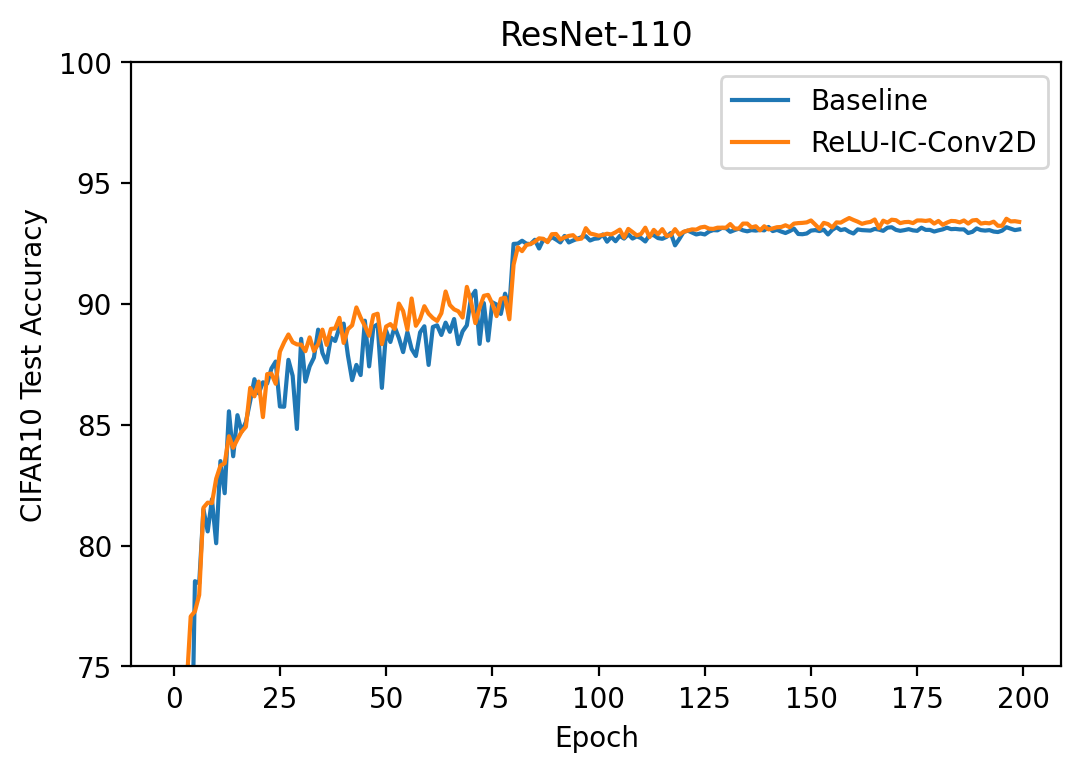

In [12]:
plt.figure(dpi=200)
plt.plot(res)
plt.plot(res_ic)
plt.ylim([75,100])
plt.legend(['Baseline','ReLU-IC-Conv2D'])
plt.ylabel('CIFAR10 Test Accuracy')
plt.xlabel('Epoch')
plt.title('ResNet-110')
plt.savefig('./figures/resnet_110_cifar10.png')

In [13]:
np.max(res)

93.19

In [14]:
np.max(res_ic)

93.56